In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import pandas
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
def generate_dataset(filename):
    col_names = ['ts','user','x_coordinate','y_coordinate','color', 'label']
    data = pandas.read_csv(filename, names = col_names, header=None, skiprows=1)
#     print(type(data))
    
#     ts = data.ts.values
    
#     print(type(ts))
    return data

In [110]:
num_labels = 2
def extract_data(filename, num_labels):
    data = generate_dataset(filename)
    dim = data.ts.values.shape[0]
    print(dim)
    #type(data.x_coordinate.values[1])
    dataset_x = np.concatenate((data.ts.values.reshape(dim,1),
                              data.user.values.reshape(dim,1),
                              data.x_coordinate.values.reshape(dim,1),
                              data.y_coordinate.values.reshape(dim,1),
                              data.color.values.reshape(dim,1)), axis=1)
    print(dataset_x.shape)
    dataset_y = np.zeros((dim,num_labels))
    for i in range(dim):
        dataset_y[i][data.label.values[i]] = 1
    print(dataset_y.shape)
    return dataset_x, dataset_y

In [153]:
train_x, train_y = extract_data('checkerboard_big.txt', num_labels)
# valid_x, valid_y = extract_data('validation.txt', num_labels)
# test_x, test_y = extract_data('test_blocks.txt', num_labels)
print(train_x)

1600
(1600, 5)
(1600, 2)
[[ 0  0  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  2  0]
 ...
 [ 0  0 39 37  0]
 [ 0  0 39 38  0]
 [ 0  0 39 39  0]]


In [140]:
def build_model():
    x = tf.placeholder(tf.float32, shape=(None, 5), name='x')    
    y = tf.placeholder(tf.float32, shape=(None, num_labels), name='y') 
    
    W1 = tf.Variable(tf.random_normal([5, 128], stddev = 0.01), name='W1')
#     W1 = tf.Variable(np.zeros((5,128),dtype=np.float32), name='W1')
    b1 = tf.Variable(tf.random_normal([128], stddev = 0.01), name='b1')
    
#     W2 = tf.Variable(tf.random_normal([128, 128], stddev = 0.5), name='W2')
#     b2 = tf.Variable(tf.random_normal([128]), name='b2')
    
    W3 = tf.Variable(tf.random_normal([128, num_labels], stddev=0.01), name='W3')
#     W3 = tf.Variable(np.zeros((128,num_labels),dtype=np.float32), name='W3')
    b3 = tf.Variable(tf.random_normal([num_labels], stddev = 0.01), name='b3')

    
    hidden_out = tf.add(tf.matmul(x, W1), b1)
    hidden_out = tf.nn.relu(hidden_out)
    
#     hidden_out2 = tf.add( tf.matmul(hidden_out, W2), b2 )
#     hidden_out2 = tf.nn.relu(hidden_out2)
    
    logits = tf.add(tf.matmul(hidden_out, W3), b3)
    prediction = tf.nn.softmax(logits)
    y_clipped = tf.clip_by_value(prediction, 1e-10, 0.9999999)
    
    loss = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped) + (1 - y) * tf.log(1 - y_clipped), axis=1))
#     loss = tf.losses.cosine_distance(y, prediction, axis = 1)
    
    train_op = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(loss)
    init = tf.global_variables_initializer()

    correct_prediction = tf.equal(tf.argmax(prediction, 1, name="Argmax_Pred"), tf.argmax(y, 1, name="Y_Pred"), name="Correct_Pred")
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32, name="Cast_Corr_Pred"), name="Accuracy")
    
    return x, y, init, train_op, loss, accuracy

In [144]:
def run(x, y, init, train_op, loss, accuracy):
    #define session
#     train_distances = pairwise_distances(train_x, metric = 'cosine')
#     test_distances = pairwise_distances(train_x, metric = 'cosine')
    MAX_THRESH = 10
    with tf.Session() as sess:
        sess.run(init)
        feed_dict = {x: train_x, y: train_y}
#         valid_dict = {x: valid_x, y: valid_y}
#         test_dict = {x: test_x, y: test_y}
        
        error_increases = 0
        old_valid_accuracy = 0
        for i in range(2000):
            #print('EPOCH', i)
            _, loss_val = sess.run([train_op, loss], feed_dict)
#             valid_accuracy = sess.run(accuracy, valid_dict)
# #             print("VALID ACC: ", valid_accuracy)
#             if (valid_accuracy < old_valid_accuracy):
#                 error_increases += 1
#                 if error_increases > MAX_THRESH:
#                     break
#             else:
#                 error_increases = 0
            
#             old_valid_accuracy = valid_accuracy
            
            #print('DONE WITH EPOCH')
            if i % 200 == 0:
                print("loss:", loss_val)

        print("Training Accuracy:", sess.run( accuracy, feed_dict))
#         print("Testing Accuracy:", sess.run( accuracy, test_dict))

In [ ]:
for i in range(20):
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy)

loss: 1.3861119
loss: 1.324079
loss: 1.2479763
loss: 1.171129
loss: 1.0979607
loss: 1.0294353
loss: 0.9847525
loss: 0.908763
loss: 0.81951934
loss: 0.6478244
Training Accuracy: 1.0
loss: 1.3867273
loss: 1.3339245
loss: 1.2473906
loss: 1.1543354
loss: 1.072771
loss: 0.9927753
loss: 0.8946285
loss: 0.8491107
loss: 0.7965466
loss: 0.691972
Training Accuracy: 1.0
loss: 1.3875062
loss: 1.3419212
loss: 1.2632074
loss: 1.1856674
loss: 1.1120375
loss: 1.046017
loss: 0.9852036
loss: 0.9250026
loss: 0.8657967
loss: 0.80274904
Training Accuracy: 1.0
loss: 1.386553
loss: 1.3213671
loss: 1.2466441
loss: 1.1679577
loss: 1.095404
loss: 1.0266043
loss: 0.9730616
loss: 0.88946855
loss: 0.94788
loss: 0.5794091
Training Accuracy: 1.0
loss: 1.3867801
loss: 1.3305728
loss: 1.2160949
loss: 1.1568743
loss: 1.0514444
loss: 1.0108807
loss: 0.91387016
loss: 0.8050853
loss: 0.7047539
loss: 0.7076423
Training Accuracy: 1.0
loss: 1.3865726
loss: 1.3464535
loss: 1.2643918
loss: 1.1851312
loss: 1.1101515
loss: 1.039

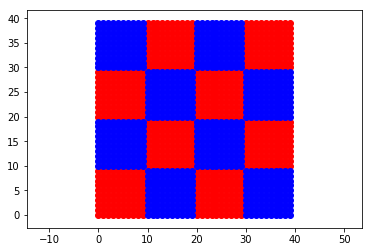

In [154]:
import numpy as np
import matplotlib.pyplot as plt

x_0 = []
x_1 = []
y_0 = []
y_1 = []

for row in train_x:
    x = row[2]
    y = row[3]
    color = row[4]
    if color == 0:
        x_0.append(x)
        y_0.append(y)
    else:
        x_1.append(x)
        y_1.append(y)

plt.scatter(x_0, y_0, c = "red")
plt.scatter(x_1, y_1, c = "blue")
plt.axis('equal')
plt.show()